# MDN Data Challenge
### Name: *Amr Maraqa* ID: *261101609*  

In [103]:
    import pandas as pd
    import numpy as np
    from numpy import where 
    from sklearn.ensemble import IsolationForest
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import GridSearchCV
    from sklearn import metrics
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import cross_val_score

    from sklearn.linear_model import Ridge
    from sklearn.linear_model import Lasso
    from sklearn.linear_model import LinearRegression
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.ensemble import GradientBoostingRegressor

## Import Data

In [160]:
df = pd.read_csv('C:\\Users\\m.maraqa\\Desktop\\MMA courses\\MDN Data Challenge\\Past_Students.csv')
test = pd.read_csv('C:\\Users\\m.maraqa\\Desktop\\MMA courses\\MDN Data Challenge\\Graduating_Class.csv')

In [9]:
df

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
345,346,316,98,1,1.5,2.0,7.43,0,0.49
346,347,304,97,2,1.5,2.0,7.64,0,0.47
347,348,299,94,1,1.0,1.0,7.34,0,0.42
348,349,302,99,1,2.0,2.0,7.25,0,0.57


## Cleaning Data

In [3]:
# Checking for NA values
df.isna().any()

Serial_No            False
GRE_Score            False
TOEFL_Score          False
University_Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance_of_Admit      False
dtype: bool

No missing values found. No imputation required.

In [11]:
# Dropping identifier variables unnecessary for prediction
df = df.drop([df.columns[0]], axis = 1)

## Detect and remove anomalies

In [135]:
df

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
344,295,96,2,1.5,2.0,7.34,0,0.47
345,316,98,1,1.5,2.0,7.43,0,0.49
346,304,97,2,1.5,2.0,7.64,0,0.47
348,302,99,1,2.0,2.0,7.25,0,0.57


In [136]:
# Detecting anomalies
iforest=IsolationForest(n_estimators=100,contamination=0.02,random_state=5)

pred=iforest.fit_predict(df)
print(pred)

# Dropping anomalies
non_anom_index=where(pred==1)
df = df.iloc[non_anom_index]

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

C:\Users\m.maraqa\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IndexError: positional indexers are out-of-bounds

In [133]:
non_anom_index

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  59,  60,  61,  62,  63,  64,  65,  66,
         67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
         80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  92,  93,
         94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
        107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
        120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
        133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146,
        147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
        160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173,
        174, 175, 176, 177, 178, 179, 180, 181, 182

## Train + Validation Set Splitting

In [17]:
# Defining target and predictors
X = df.drop('Chance_of_Admit', axis = 1)
y = df['Chance_of_Admit']

In [18]:
X['LOR'].describe()

count    343.000000
mean       3.481050
std        0.891196
min        1.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: LOR, dtype: float64

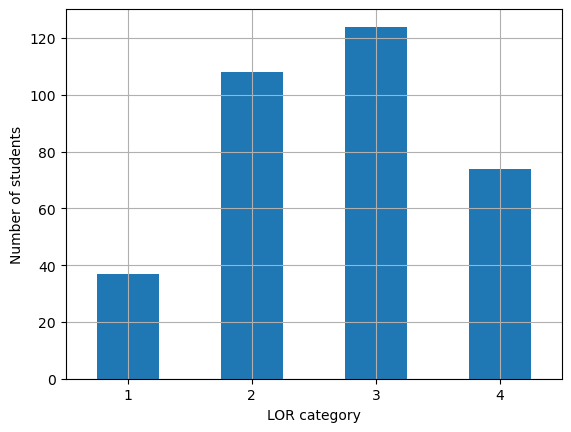

In [23]:
# Stratifying the split with respect to LOR rating to avoid sampling bias
# Step 1: Checking LOR rating distribution to make sure size of strata doesn't skew results 
X['LOR_cat'] = pd.cut(X['LOR'], bins = [1, 2, 3, 4, 5], labels = [1, 2, 3, 4])

#Step 2: Visualizing LOR_cat distribution
X['LOR_cat'].value_counts().sort_index().plot.bar(rot = 0, grid = True)
plt.xlabel('LOR category')
plt.ylabel('Number of students')
plt.show()

In [24]:
# 80%-20% Train-Val split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,stratify = X['LOR_cat'], random_state=5)

In [32]:
# Comparing composition of Val set with that of population (X)
val_comp = X_val['LOR_cat'].value_counts().sort_index()/len(X_val)
pop_comp = X['LOR_cat'].value_counts().sort_index()/len(X)
comp = pd.DataFrame({'% POP':pop_comp, '% VAL':val_comp}, index = [1,2,3,4])
comp.index.name = 'LOR Category'
comp['% Comp Error'] = val_comp/pop_comp - 1
comp

,% POP,% VAL,% Comp Error
LOR Category,,,
1,0.107872,0.101449,-0.059538
2,0.314869,0.318841,0.012614
3,0.361516,0.362319,0.002221
4,0.215743,0.217391,0.007638


As can be seen in the table above, the composition of the validation set (sample) is similar to that of the original training set (population), with negligible composition error. 

In [41]:
# Drop LOR_cat from sets (wont be required)
X_train = X_train.drop('LOR_cat', axis = 1).reset_index(drop = True)
X_val = X_val.drop('LOR_cat', axis = 1).reset_index(drop = True)

In [42]:
X_train

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,304,105,2,3.0,3.0,8.20,1
1,333,119,5,5.0,4.5,9.78,1
2,336,118,5,4.5,5.0,9.53,1
3,309,104,2,2.0,2.5,8.26,0
4,333,118,5,5.0,5.0,9.35,1
...,...,...,...,...,...,...,...
269,327,104,5,3.0,3.5,8.84,1
270,313,107,3,4.0,4.5,8.69,0
271,312,105,2,2.0,2.5,8.45,0
272,296,99,2,3.0,3.5,7.28,0


## Standardize Data

In [108]:
# Standardizing based on training set
scaler = StandardScaler()

# Standardization applies only to numerical variables. Drop 'Research' and join after standardization
res_train = X_train['Research']
res_val = X_val['Research']
X_train = X_train.drop('Research', axis = 1)
X_val = X_val.drop('Research', axis = 1)

# Standardize training set
X_train_std = scaler.fit_transform(X_train)
X_train_std = pd.DataFrame(X_train_std, columns = X_train.columns)
#Join 'Research' to training and std_training sets
X_train['Research'] = res_train
X_train_std['Research'] = res_train

# Standardize val set
X_val_std = scaler.transform(X_val)
X_val_std = pd.DataFrame(X_val_std, columns = X_val.columns)
#Join 'Research' to training and std_training sets
X_val['Research'] = res_val
X_val_std['Research'] = res_val

In [109]:
X_val_std

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,1.289903,1.721007,1.597354,1.576829,1.694715,1.760335,1
1,1.112432,1.203950,1.597354,1.067335,-0.537746,1.233062,1
2,0.313813,0.169836,-0.153346,0.048346,0.020369,0.283971,1
3,-1.460897,-0.691925,-0.153346,0.048346,0.578485,-0.911182,1
4,1.023697,0.859245,1.597354,1.576829,1.136600,1.426396,1
...,...,...,...,...,...,...,...
64,-0.928484,0.342188,0.722004,0.557841,1.136600,-0.471788,0
65,-1.638368,-1.381334,-1.028696,-0.461148,0.020369,-1.333000,0
66,-0.307336,-0.174868,-1.028696,-0.970643,0.578485,-0.137848,0
67,1.201167,1.376302,1.597354,1.576829,1.694715,1.303365,1


## Linear Regression

In [144]:
# Building and fitting model to training set (Std data)
lr = LinearRegression() 
model = lr.fit(X_train_std,y_train) 

print(f'The regression intercept is {model.intercept_}')
print(f"\nEstimated regression parameters:\n {pd.DataFrame({'Variables':X_train.columns, 'Beta':model.coef_})}")

# Generating and testing predictions
y_val_pred = model.predict(X_val_std)
mse_lr = mean_squared_error(y_val,y_val_pred)
print(f'\nThe RMSE of the LR model is {np.sqrt(mse_lr):.4f}')

The regression intercept is 0.7241812528192324

Estimated regression parameters:
            Variables      Beta
0          GRE_Score  0.023699
1        TOEFL_Score  0.012982
2  University_Rating  0.011583
3                SOP -0.000482
4                LOR  0.016472
5               CGPA  0.062939
6           Research  0.014257

The RMSE of the LR model is 0.0686


In [110]:
# Building and fitting model to training set (Normalized data)
lr = LinearRegression() 
model = lr.fit(X_train_norm,y_train) 

print(f'The regression intercept is {model.intercept_}')
print(f"\nEstimated regression parameters:\n {pd.DataFrame({'Variables':X_train.columns, 'Beta':model.coef_})}")

# Generating and testing predictions
y_val_pred = model.predict(X_val_norm)
mse_lr = mean_squared_error(y_val,y_val_pred)
print(f'\nThe RMSE of the LR model is {np.sqrt(mse_lr):.4f}')

The regression intercept is 0.42195788913852184

Estimated regression parameters:
            Variables      Beta
0          GRE_Score  0.105147
1        TOEFL_Score  0.060411
2  University_Rating  0.040558
3                SOP -0.001965
4                LOR  0.064351
5               CGPA  0.294248
6           Research  0.014257

The RMSE of the LR model is 0.0686


The performance of the LR model on botht the normalized and the standardized data sets is the same.

## LASSO Regression (Feature Selection)

In [120]:
# Finding optimal alpha value (std data)
alps = []
cv_scores = []
for i in np.arange(0,1,0.01):
    alps.append(i)
    lasso = Lasso(alpha = i, random_state = 5)
    model = lasso.fit(X_train_std,y_train)
    scores = -cross_val_score(lasso, X_train_std, y_train, cv = 10, scoring = 'neg_mean_squared_error')
    cv_scores.append(scores.mean())

optimal_alp = alps[cv_scores.index(min(cv_scores))]
print(f'The optimal alpha value is {optimal_alp}')

C:\Users\m.maraqa\AppData\Local\Temp\ipykernel_22360\3934483825.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model = lasso.fit(X_train_std,y_train)
C:\Users\m.maraqa\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\m.maraqa\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.075e-01, tolerance: 4.918e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coord

The optimal alpha value is 0.0


In [119]:
# Finding optimal alpha value (Norm data)
alps = []
cv_scores = []
for i in np.arange(0,1,0.01):
    alps.append(i)
    lasso = Lasso(alpha = i, random_state = 5)
    model = lasso.fit(X_train_std,y_train)
    scores = -cross_val_score(lasso, X_train_norm, y_train, cv = 10, scoring = 'neg_mean_squared_error')
    cv_scores.append(scores.mean())

optimal_alp = alps[cv_scores.index(min(cv_scores))]
print(f'The optimal alpha value is {optimal_alp}')

C:\Users\m.maraqa\AppData\Local\Temp\ipykernel_22360\1593691696.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model = lasso.fit(X_train_std,y_train)
C:\Users\m.maraqa\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\m.maraqa\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.075e-01, tolerance: 4.918e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coord

The optimal alpha value is 0.0


Since the results of the cross validation of the LASSO regression show that the optimal alpha value is 0, the simple linear model performs better any other LASSO model.

## Ridge Regression

In [121]:
alps = []
cv_scores = []
for i in range(40,80,10):
    alps.append(i)
    rdg = Ridge(alpha=i)
    model = rdg.fit(X_train_std,y_train)
    scores = -cross_val_score(estimator = model, X = X_train_std, y = y_train, cv = 10, scoring = 'neg_mean_squared_error')
    cv_scores.append(scores.mean())

optimal_alp = alps[cv_scores.index(max(cv_scores))]
print(f'The optimal alpha value is {optimal_alp}')

The optimal alpha value is 70


In [125]:
opt_rdg = Ridge(alpha = 70)
model = opt_rdg.fit(X_train_std, y_train)

# Generating and testing predictions
y_val_pred = model.predict(X_val_std)
mse_rdg = mean_squared_error(y_val,y_val_pred)
print(f'\nThe RMSE of the Ridge Regression model is {np.sqrt(mse_rdg):.4f}')


The RMSE of the Ridge Regression model is 0.0706


The ridge regression performed worse than the linear regression.

## Random Forest Regression

In [138]:
# Finding the optimal hyperparameters
rf_ps = {'min_samples_split': list(range(2,5,1)),
         'min_samples_leaf': list(range(1,5,1)),
         'max_depth': list(range(1,6)),
         'n_estimators': list(range(1,7)),
         'max_features':['auto', 'log2' ,'sqrt']}

rf=RandomForestRegressor(random_state=0)
gcv_rf = GridSearchCV(estimator = rf, param_grid = rf_ps, cv = 5, n_jobs = -1, verbose = True, scoring = 'neg_mean_squared_error')
gcv_rf.fit(X_train_std, y_train)
print('Best parameter combination for RF model is\n', gcv_rf.best_params_)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
Best parameter combination for RF model is
 {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 6}


In [139]:
rf = RandomForestRegressor(max_depth = 4, max_features = 'log2', min_samples_leaf = 3, min_samples_split = 2, n_estimators = 6, random_state=0)
model = rf.fit(X_train_std, y_train)

# Generating and testing predictions
y_val_pred = model.predict(X_val_std)
mse_rf = mean_squared_error(y_val,y_val_pred)
print(f'\nThe RMSE of the Random Forest model is {np.sqrt(mse_rf):.4f}')


The RMSE of the Random Forest model is 0.0722


## Gradient Boosted Trees Regression

In [140]:
# Finding optimal hyperparameters
gbt_ps = {'learning_rate': list(i for i in np.arange(0.025, 0.125, 0.025)),
          'min_samples_split': list(range(2,5,1)),
          'min_samples_leaf': list(range(1,5,1)),
          'max_depth': list(range(2,6)),
          'n_estimators': list(range(1,7,1)),
          'max_features':['auto', 'log2' ,'sqrt']}

gbt = GradientBoostingRegressor(random_state = 0)
gcv_gbt = GridSearchCV(estimator = gbt, param_grid = gbt_ps, cv = 5, n_jobs = -1, verbose = True, scoring = 'neg_mean_squared_error')
gcv_gbt.fit(X_train_std, y_train)
print('Best parameter combination for GBT model is\n', gcv_gbt.best_params_)

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits
Best parameter combination for GBT model is
 {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 6}


In [143]:
gbt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 4, max_features = 'auto', min_samples_leaf = 4, min_samples_split = 2, n_estimators = 6, random_state = 0)
model = gbt.fit(X_train_std, y_train)

# Generating and testing predictions
y_val_pred = model.predict(X_val_std)
mse_gbt = mean_squared_error(y_val,y_val_pred)
print(f'\nThe RMSE of the Gradient Boosting Regressor model is {np.sqrt(mse_gbt):.4f}')


The RMSE of the Gradient Boosting Regressor model is 0.1001


## Final Model

After testing multiple prediction models, it was found that the Linear Regression model performed the best. The model and its MSE are below.

In [145]:
# Building and fitting model to training set (Std data)
lr = LinearRegression() 
model = lr.fit(X_train_std,y_train) 

print(f'The regression intercept is {model.intercept_}')
print(f"\nEstimated regression parameters:\n {pd.DataFrame({'Variables':X_train.columns, 'Beta':model.coef_})}")

# Generating and testing predictions
y_val_pred = model.predict(X_val_std)
mse_lr = mean_squared_error(y_val,y_val_pred)
print(f'\nThe MSE of the LR model is {mse_lr:.4f}')

The regression intercept is 0.7241812528192324

Estimated regression parameters:
            Variables      Beta
0          GRE_Score  0.023699
1        TOEFL_Score  0.012982
2  University_Rating  0.011583
3                SOP -0.000482
4                LOR  0.016472
5               CGPA  0.062939
6           Research  0.014257

The MSE of the LR model is 0.0047


### Running model on test set to get prediction

In [161]:
# Dropping serial number
ser_num = test['Serial_No']
test = test.drop(test.columns[0], axis = 1)

# Standardizing 
#removing research column
test_res = test['Research']
test = test.drop('Research', axis = 1)
X_test_std = scaler.transform(test)

# Dataframe 
X_test_std = pd.DataFrame(X_test_std, columns = test.columns)
#Join 'Research' to training and std_training sets
test['Research'] = test_res
X_test_std['Research'] = test_res

In [162]:
X_test_std

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,0.047606,-0.174868,-0.153346,-0.461148,0.020369,-0.647545,1
1,0.668755,0.342188,0.722004,0.048346,0.578485,0.055486,1
2,-1.283426,-1.381334,-1.028696,-0.461148,0.020369,-1.016636,1
3,-1.549632,-1.036630,-0.153346,0.048346,-1.095862,-0.823303,0
4,-1.815839,-1.726039,-1.028696,-0.970643,-0.537746,-1.702092,0
5,-0.041129,-0.347221,-1.028696,-1.480137,0.020369,-0.911182,0
6,0.846226,0.169836,-0.153346,0.048346,0.578485,0.231243,1
7,-1.460897,-0.691925,-1.028696,0.048346,0.020369,-1.315425,1
8,-0.307336,-0.519573,-1.028696,-0.970643,-1.653977,-1.754819,0
9,0.313813,-0.174868,-1.028696,-1.480137,-2.212093,-0.348757,0


In [164]:
y_test_pred = model.predict(X_test_std)
y_test_pred

array([0.69532259, 0.78009034, 0.61474675, 0.6023315 , 0.53130786,
       0.65048358, 0.78298115, 0.6004397 , 0.56101519, 0.65975874,
       0.77846389, 0.89924169, 0.90859721, 0.63774893, 0.75225846,
       0.8359872 , 0.7187001 , 0.51892307, 0.51493617, 0.58390593,
       0.6236933 , 0.81030238, 0.92795691, 0.72678046, 0.57366298,
       0.54268708, 0.48189819, 0.48085943, 0.52262606, 0.651175  ,
       0.76902265, 0.73719845, 0.83059357, 0.62644411, 0.95435899,
       0.97178314, 0.58980758, 0.62500433, 0.52345305, 0.7295187 ,
       0.63011323, 0.71216136, 0.82700825, 0.70712094, 0.85219527,
       0.79958394, 0.80296354, 0.89876914, 0.72486132, 0.92135242])

In [167]:
test['Serial_No'] = ser_num
test['Chance_of_Admit'] = y_test_pred
test

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Serial_No,Chance_of_Admit
0,318,107,3,3.0,3.5,8.27,1,351,0.695323
1,325,110,4,3.5,4.0,8.67,1,352,0.780090
2,303,100,2,3.0,3.5,8.06,1,353,0.614747
3,300,102,3,3.5,2.5,8.17,0,354,0.602331
4,297,98,2,2.5,3.0,7.67,0,355,0.531308
5,317,106,2,2.0,3.5,8.12,0,356,0.650484
6,327,109,3,3.5,4.0,8.77,1,357,0.782981
7,301,104,2,3.5,3.5,7.89,1,358,0.600440
8,314,105,2,2.5,2.0,7.64,0,359,0.561015
9,321,107,2,2.0,1.5,8.44,0,360,0.659759


In [168]:
test.to_csv('C:\\Users\\m.maraqa\\Desktop\\MMA courses\\MDN Data Challenge\\Graduating_Class.csv', index = False)